In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf
import rubin_sim.utils as rsUtils

In [7]:
dbs = [maf.db.OpsimDatabase('long_gaps_nightsoff1_v2.0_10yrs.db'),
       maf.db.OpsimDatabase('../baseline/baseline_v2.0_10yrs.db')]
names= ['long_gaps', 'baseline']

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database observations with constraint note not like "%twi%" for columns ['rotSkyPos', 'observationStartMJD', 'fieldDec', 'night', 'fieldRA']
Found 1793190 visits
Running:  ['long_gaps_Median_Intra-Night_Gap_note_not_like_twi_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "note not like "%twi%"" constraint now.


/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:541: UserWarning: 0.0 180.0 -180.0 180.0
  warnings.warn(
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:656: UserWarning: The interval between parallels is 30 deg -0.00'.
  warnings.warn(
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:664: UserWarning: The interval between meridians is 30 deg -0.00'.
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database observations with constraint note not like "%twi%" for columns ['rotSkyPos', 'observationStartMJD', 'fieldDec', 'night', 'fieldRA']
Found 1800404 visits
Running:  ['baseline_Median_Intra-Night_Gap_note_not_like_twi_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "note not like "%twi%"" constraint now.


/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:541: UserWarning: 0.0 180.0 -180.0 180.0
  warnings.warn(
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:656: UserWarning: The interval between parallels is 30 deg -0.00'.
  warnings.warn(
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:664: UserWarning: The interval between meridians is 30 deg -0.00'.
  warnings.warn(


Plotting complete.


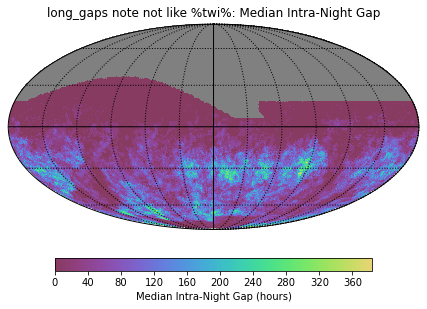

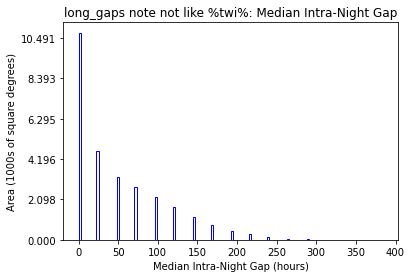

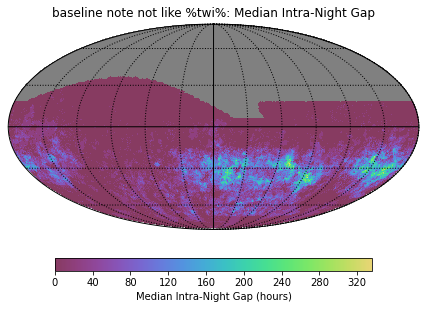

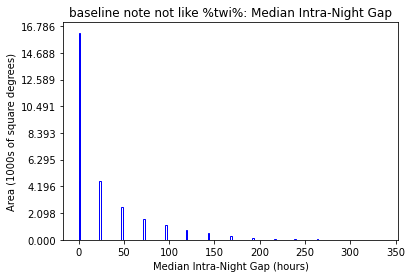

In [14]:
def nover4(inarr):
    return np.where(inarr > 4/24.)[0].size
    


plotDict = {} # {'colorMin': 0.5, 'colorMax': 5}
for db,name in zip(dbs,names):
    bundleList = []

    metric = maf.metrics.IntraNightGapsMetric(reduceFunc=nover4)

    slicer = maf.slicers.HealpixSlicer()
    constraint = 'note not like "%twi%"'
    bundleList.append(maf.MetricBundle(metric, slicer, constraint, runName=name, plotDict=plotDict))

    outDir = 'temp'
    bd = maf.metricBundles.makeBundlesDictFromList(bundleList)
    bg = maf.MetricBundleGroup(bd, db, outDir='temp')
    bg.runAll()
    bg.plotAll(closefigs=False)